# Newtoninterpolasjon 
Gitt måleverdier $(x_i,y_i)$ for $i=0,1,\ldots,n+1$ for ulike $x_i$, søker vi polynomet 
$$
p_n(x) = c_0 + c_1(x-x_0) + c_2(x-x_0)(x-x_1) + \cdots + c_n(x-x_0)(x-x_1) \cdots (x-x_{n-1})$$ 
som tilfredstiller 
$$
p_n(x_i) = y_i \qquad i =0,1,\ldots, n.
$$ 

Metode 1 bestemmer koeffisientene som følger:
* $c_0 = y_0$ og 
* 
$$
c_{1} = \frac{y_1 -c_0 }{(x_1-x_0)}
$$

* 
$$
c_{2} = \frac{y_2 - \Big(c_0 +c_1(x_2-x_0) \Big)}{(x_2-x_0)(x_2-x_1)}
$$
* og så videre fram til siste koeffisient
$$
c_{n} = \frac{y_n - \Big(c_0 +c_1(x_n-x_0) + \cdots + c_{n-1}(x_n-x_0)(x_n-x_1)\cdots(x_n-x_{n-1})\Big)}{(x_n-x_0)(x_n-x_1)\cdots (x_n-x_{n-1})}
$$

Mer kompakt kan vi skrive alle stegene over slik
$$
c_k = \frac{y_k -\sum_{i=0}^{k-1} c_i \prod_{j=0}^{i-1}(x_k-x_j) }{\prod_{j=0}^{k-1}(x_k-x_j)} \qquad k =0,1,\ldots, n.
$$

La oss teste metoden på interpolasjonsproblemet 
$$
(x_0, x_1, x_2,x_3) =  (-5, -1, 0, 2)\\
(y_0, y_1,\, y_2, \,y_3) = (-2, \,\,\,\,\, 6,\, 1, 3)
$$

I koden for å evaluere polynomet på Newtonform bruker vi Horners regel for å minimere antallet regneoperasjoner i evalueringen. Evalueringen ser slik ut (evaluer fra innerste parentes og utover):
$$
p_n(z) = c_0 + (z-x_0)(c_1 + (z-x_1)(c_2+(z-x_2)(c_3 + \cdots +(z-x_{n-2})(c_{n-1} + (z-x_{n-1})c_n))))
$$

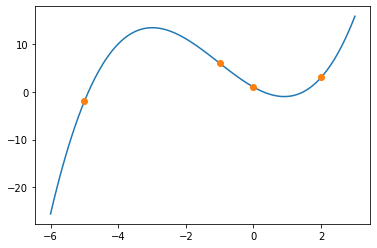

Løsning c Metode 1                  : [-2.          2.         -1.4         0.48571429]
Løsning c Metode 2 (fra forelesning): [-2.          2.         -1.4         0.48571429]


In [7]:
import matplotlib.pyplot as plt
import numpy as np


def pHorner(c,x,z):
    # Bruk Horners regel til å beregne newtonpolynomet   
    # p(z) = c_0 + c_1(z-x_0) + ... + c_{k-1}(z-x_0)...(z-x_{k-1})
    # i punktene z 
    k = len(c);
    if k ==1:
        p = c[0]*np.ones(np.size(z)); # p = c_0*z^0  
    else:   
        p = (z-x[k-2])*c[k-1];
        for j in range(k-2,0,-1):
            p = (z-x[j-1])*(c[j]+ p); 
            
        p = c[0]+p
    return p


xp = np.array([-5, -1, 0, 2]);
yp = np.array([-2, 6, 1, 3]);

#Metode 1
c = np.zeros(len(xp))
c[0] = yp[0];
for k in range(1,len(c)):
    c[k] = (yp[k] - pHorner(c[0:k],xp[0:k],xp[k]) )/ (np.prod(xp[k]-xp[0:k]))

z = np.linspace(-6,3,100) # gitter av punkter pa intervallet [-6,3]
# polynominterpolanten:
p3 = pHorner(c,xp,z);

plt.plot(z,p3)
plt.plot(xp, yp, 'o')
plt.show()

print("Løsning c Metode 1                  :", c)
print("Løsning c Metode 2 (fra forelesning):", np.array([-2, 2, -7./5, 17./35]))
